In [21]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt

import pickle

from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, GlobalAveragePooling1D, Flatten, BatchNormalization

In [2]:
import sys

sys.path.append('../utils')

In [3]:
from predict import predict_class

In [4]:
TOKENIZER_PATH = '../learned_models/tokenizer.pickle'

X_TRAIN_PATH = '../data/x_train.json'
Y_TRAIN_PATH = '../data/y_train.json'

In [5]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [6]:
x_train = pd.read_json(X_TRAIN_PATH).values
y_train = pd.read_json(Y_TRAIN_PATH)

In [7]:
x_train, y_train

(array([[   0,    0,    0, ...,    7,    9,   10],
        [   0,    0,    0, ..., 2108, 3568,   74],
        [   0,    0,    0, ...,    7,    9,   10],
        ...,
        [   0,    0,    0, ...,   54,  515,  344],
        [   0,    0,    0, ...,  439,   24,   26],
        [   0,    0,    0, ...,   69,   69, 1602]]),
       АВТО БАТЯ  АЭРОФЛОТ  Телеграмма РЖД
 0             1         0               0
 1             1         0               0
 2             1         0               0
 3             1         0               0
 4             1         0               0
 ...         ...       ...             ...
 3085          0         0               1
 3086          0         0               1
 3087          0         0               1
 3088          0         0               1
 3089          0         0               1
 
 [3090 rows x 3 columns])

In [8]:
NUM_WORDS = 5_000                                 # Максимальное количество слов
MAX_NEWS_LEN = 100                                # Максимальная длина новости
NB_CLASSES = y_train.keys().shape[0]              # Количество классов

In [9]:
EMBEDDING_DIM = 32

In [10]:
model_cnn = Sequential()
model_cnn.add(Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAX_NEWS_LEN))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
# model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(NB_CLASSES, activation='softmax'))


/opt/anaconda3/envs/python-3-10-14-base-backend-ml/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# TODO: баланс классов

In [14]:
# history_cnn = model_cnn.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.15)
# history_cnn = model_cnn.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1) # 0.98 & 0.81 # good on old, small dataset
# history_cnn = model_cnn.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.1) # Not bad on extended dataset
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.05) 
# history_cnn = model_cnn.fit(x_train, y_train, epochs=25, batch_size=128, validation_split=0.2) 
# history_cnn = model_cnn.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4808 - loss: 0.9305 - val_accuracy: 0.0000e+00 - val_loss: 0.9782
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8055 - loss: 0.3630 - val_accuracy: 0.9871 - val_loss: 0.2886
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9529 - loss: 0.1254 - val_accuracy: 0.9613 - val_loss: 0.0896
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9944 - loss: 0.0258 - val_accuracy: 0.9742 - val_loss: 0.0505
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9975 - loss: 0.0137 - val_accuracy: 0.9871 - val_loss: 0.0303


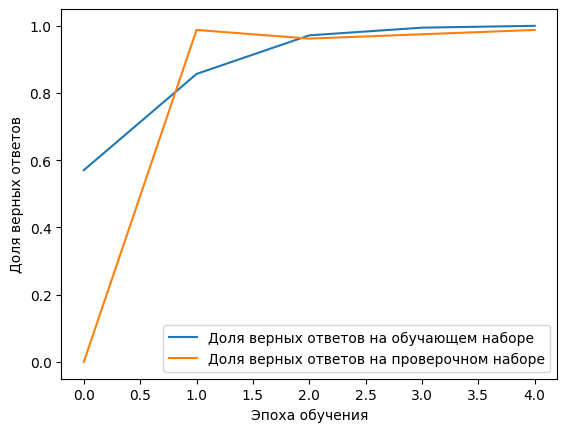

In [15]:
plt.plot(history_cnn.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

plt.legend()
plt.show()

In [16]:
text = 'Автомобили ДТП жесть, авария'

predict_class(model_cnn, tokenizer, text, y_train, MAX_NEWS_LEN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'АВТО БАТЯ'

In [17]:
text = 'На перекрестке произошло жесткое ДТП с участием 3 машин'

predict_class(model_cnn, tokenizer, text, y_train, MAX_NEWS_LEN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


'Телеграмма РЖД'

In [18]:
text = 'Во время перелета Москва - Дубаи закончилось питание на борту'

predict_class(model_cnn, tokenizer, text, y_train, MAX_NEWS_LEN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


'АЭРОФЛОТ'

In [19]:
text = 'На восток перевозили 10 кг угля в особых вагонах'

predict_class(model_cnn, tokenizer, text, y_train, MAX_NEWS_LEN)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


'Телеграмма РЖД'

In [23]:
SAVE_MODEL_PATH = '../learned_models'
save_model(model_cnn, f'{SAVE_MODEL_PATH}/model_cnn.h5')